# Plastic activity

In this jupyternotebook we are going to detect T1 events between each individual bubble in a set of images.

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imsave
import skimage.measure 
import pickle as pkl
import os
import spam

# Import FoamQuant library
from FoamQuant import *

# Set matplotlib default font size
plt.rc('font', size=25) 

In [2]:
# Create the processing pipeline
ProcessPipeline = ['P4_BubbleSegmented','P5_BubbleNoEdge','Q7_RegProp','Q8_Tracking', 
                   'Q9_Contacts','Q10_Translated','Q11_LostNewContacts','Q12_T1']

for Pi in ProcessPipeline:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created:',Pi)
        os.mkdir(Pi)

path already exist: P4_BubbleSegmented
path already exist: P5_BubbleNoEdge
path already exist: Q7_RegProp
path already exist: Q8_Tracking
path already exist: Q9_Contacts
path already exist: Q10_Translated
path already exist: Q11_LostNewContacts
path already exist: Q12_T1


## A) Type of imput data

The images we are extracting the individual bubble stress tensor are bubble-segmented images with removed labels on the edge of the images.

In [3]:
# Read/Save image names and directories
dirread = ProcessPipeline[1]+'/'
nameread = 'BubbleNoEdge_'
imrange = [1,2,3,4,5]

In [4]:
# Read the first image of the series
Lab = imread(dirread+nameread+strindex(imrange[0], 3)+'.tiff')

# Create a random colormap
rcmap = RandomCmap(5000)

# Show a 3D-cut view of the volume
Cut3D(Lab, 
      showcuts=True,
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=7,           # tune this parrameter to change the figure size
      zcut=30,                  # tune this parrameter to change the orthogonal z-cut position
      ycut=False,               # tune this parrameter to change the orthogonal y-cut position
      xcut=False)               # tune this parrameter to change the orthogonal x-cut position

Number of labels: 5000


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/Jupy_FoamQuant/FoamQuant/Figure.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Error in callback <function _draw_all_if_interactive at 0x149e32632d30> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x149dbf3c8af0> (for post_execute):



KeyboardInterrupt



## B) Track the bubbles

In [11]:
# Read/Save names and directories
nameread = 'BubbleNoEdge_'
namesave = 'Props_'
dirread = ProcessPipeline[1]+'/'
dirsave = ProcessPipeline[2]+'/'
# Images indexes
imrange = [1,2,3,4,5]

In [12]:
# Region properties
RegionProp_Batch(nameread,
                 namesave,
                 dirread,
                 dirsave,
                 imrange,
                 verbose=True,
                 field=[40,220,40,220,40,220], # tune this parrameter if you wish
                 endread='.tiff', 
                 endsave='.tsv')

Path exist: True
Props_001: done
Props_002: done
Props_003: done
Props_004: done
Props_005: done


## C) Bubble tracking

In [5]:
# Read/Save image names and directories
nameread = 'Props_'
namesave = 'Tracking_'
dirread = ProcessPipeline[2]+'/'
dirsave = ProcessPipeline[3]+'/'
# Images indexes
imrange = [1,2,3,4,5]

In [15]:
# Tracking
LabelTracking_Batch(nameread, 
                    namesave, 
                    dirread, 
                    dirsave,
                    imrange,
                    verbose=False,
                    endread='.tsv',
                    endsave='.tsv',
                    n0=3,
                    searchbox=[-10,10,-10,10,-10,10],   # tune this parrameter if you wish
                    Volpercent=0.05)              # tune this parrameter if you wish

Path exist: True


100%|██████████| 504/504 [00:00<00:00, 812.91it/s]


Lost tracking: 13 2.579365079365079 %


100%|██████████| 506/506 [00:00<00:00, 792.46it/s]


Lost tracking: 9 1.7786561264822136 %


100%|██████████| 511/511 [00:00<00:00, 803.22it/s]


Lost tracking: 7 1.36986301369863 %


100%|██████████| 514/514 [00:00<00:00, 736.20it/s]

Lost tracking: 16 3.11284046692607 %


## D) Contact topology

In [11]:
# Read/Save image names and directories
nameread = 'BubbleSeg_'
nameread_noedge = 'BubbleNoEdge_'
namesave = 'Contact_'
dirread = ProcessPipeline[0]+'/'
dirread_noedge = ProcessPipeline[1]+'/'
dirsave = ProcessPipeline[4]+'/'
# Images indexes
imrange = [1,2,3,4,5]

In [5]:
GetContacts_Batch(nameread,
                  nameread_noedge,
                  namesave,
                  dirread,
                  dirread_noedge,
                  dirsave,
                  imrange,
                  verbose=True)

Path exist: True
Contact_001: done
Contact_002: done
Contact_003: done
Contact_004: done
Contact_005: done


## E) Translate contact pairs

In [57]:
# Read/Save image names and directories
nameread = 'Contact_pair_'
nameread_track = 'Tracking_'
namesave = 'Translated_pair_'
dirread = ProcessPipeline[4]+'/'
dirread_track = ProcessPipeline[3]+'/'
dirsave = ProcessPipeline[5]+'/'
# Images indexes
imrange = [1,2,3,4,5]

In [4]:
Translate_Pairs_Batch(nameread, 
                      namesave, 
                      nameread_track, 
                      dirread_track, 
                      dirread, 
                      dirsave, 
                      imrange, 
                      endsave='.tsv', 
                      n0=3)

Tracking_001_002 : done
Contact_pair_002: done


100%|██████████| 5026/5026 [00:00<00:00, 5483.67it/s]


Tracking_002_003 : done
Contact_pair_003: done


100%|██████████| 5033/5033 [00:00<00:00, 5498.18it/s]


Tracking_003_004 : done
Contact_pair_004: done


100%|██████████| 5005/5005 [00:00<00:00, 5525.60it/s]


Tracking_004_005 : done
Contact_pair_005: done


100%|██████████| 5037/5037 [00:00<00:00, 5455.60it/s]


In [86]:
LTrack = Read_LabelTracking(nameread_track, dirread_track, imrange, verbose=False, endread='.tsv', n0=3)

In [87]:
LCoord=[]
LV=[]
for i in range(len(LTrack[0]['z1'])):
    if np.max(np.abs([LTrack[0]['z2'][i]-LTrack[0]['z1'][i],
               LTrack[0]['y2'][i]-LTrack[0]['y1'][i],
               LTrack[0]['x2'][i]-LTrack[0]['x1'][i]]))<5:
        LCoord.append([LTrack[0]['z1'][i],LTrack[0]['y1'][i],LTrack[0]['x1'][i]])
        LV.append([LTrack[0]['z2'][i]-LTrack[0]['z1'][i],
                   LTrack[0]['y2'][i]-LTrack[0]['y1'][i],
                   LTrack[0]['x2'][i]-LTrack[0]['x1'][i]])

In [88]:
writeGlyphsVTK(np.asarray(LCoord),
                   {'disp':np.asarray(LV)},
                   fileName='Velocity.vtk')

flatten vector


In [ ]:
nameread_track = 'Tracking_'
namesave = 'Translated_pair_'
dirread = ProcessPipeline[4]+'/'
dirread_track = ProcessPipeline[3]+'/'

In [85]:
namesave = name+'_BTracking_t'+str(trange[0])+'_'+str(trange[-1])+'.pkl'
dirsave = quantdir+'/51_Combined_BTracking/'+name+'/'
with open(dirsave+namesave,'rb') as file:
    TrackQ = pkl.load(file)

NameError: name 'name' is not defined

In [83]:
LCoord=[]
LV=[]
LU=[]
Ltrack=[]

for i in range(0,len(combined['z']),100):
    if combined['z'][i][-1]>0:
        for ti in range(len(combined['z'][i])):
            LCoord.append([combined['z'][i][ti],combined['y'][i][ti],combined['x'][i][ti]])
            #LV.append([combined['dz'][i][ti],combined['dy'][i][ti],combined['dx'][i][ti]])
            LU.append(combined['U'][i][ti])
            Ltrack.append(count)
        count+=1

In [84]:
LCoord

[[41.51312282140661, 79.92977240106623, 46.697252409268],
 [41.79150579150579, 79.67222109327372, 47.9958341800447],
 [43.53672779428337, 79.27456203257863, 48.17846532117611],
 [44.77236600774404, 79.58192378235174, 48.85826370491135],
 [76.55706834055344, 138.86066660772698, 219.29944302006896],
 [78.2241318526353, 138.34628944121278, 219.0073153534285],
 [78.238722306255, 138.74926594892784, 217.9467924192544],
 [77.3816348195329, 135.90322009907996, 217.0486553432413],
 [110.49553327256152, 94.2126709206928, 190.096900638104],
 [111.43008011653312, 92.82274217042972, 189.79688638018936],
 [111.55935926773456, 93.44787185354691, 189.15304347826088],
 [113.99279788494847, 94.62175221077582, 188.7939648099189],
 [147.06228897426942, 53.38456164862033, 87.52485737571313],
 [150.4100023046785, 51.43754321272183, 87.37497119151878],
 [154.61926118257995, 49.42322672016995, 79.06798064439985],
 [155.7008018327606, 49.47365406643757, 78.10022909507445],
 [184.37321536296, 67.43173134928614

In [68]:
writeGlyphsVTK(np.asarray(LCoord),
                   {'disp':np.asarray(LV),'U':np.asarray(LU),'bbl':np.asarray(Ltrack)},
                   fileName='Tracking.vtk')

flatten vector
flatten scalar
flatten scalar


## F) Detect lost and new contacts

In [9]:
# Read/Save image names and directories
pairsdirname = [ProcessPipeline[4]+'/','Contact_pair_']
pairstrldirname = [ProcessPipeline[5]+'/','Translated_pair_']
regdirname = [ProcessPipeline[2]+'/','Props_']

savedirnamelost = [ProcessPipeline[6]+'/','Lost_']
savedirnamenew = [ProcessPipeline[6]+'/','New_']

# Images indexes
imrange = [1,2,3,4,5]

In [15]:
LostNewContact_Batch(pairsdirname, 
                     pairstrldirname, 
                     savedirnamelost, 
                     regdirname, 
                     savedirnamenew, 
                     imrange, 
                     verbose=True)

Contact_pair_001: done
Translated_pair_002: done
Props_001: done
LostContact


100%|██████████| 4960/4960 [00:00<00:00, 16217.84it/s]


>>> Retrieve the coordinates


100%|██████████| 66/66 [00:00<00:00, 5437.30it/s]


1.3306451612903225 %
NewContact


100%|██████████| 5026/5026 [00:00<00:00, 16435.79it/s]


1.2096774193548387 %
Contact_pair_002: done
Translated_pair_003: done
Props_002: done
LostContact


100%|██████████| 5026/5026 [00:00<00:00, 16132.90it/s]


>>> Retrieve the coordinates


100%|██████████| 68/68 [00:00<00:00, 5437.28it/s]


1.3529645841623557 %
NewContact


100%|██████████| 5033/5033 [00:00<00:00, 16098.69it/s]


1.1142061281337048 %
Contact_pair_003: done
Translated_pair_004: done
Props_003: done
LostContact


100%|██████████| 5033/5033 [00:00<00:00, 15592.16it/s]


>>> Retrieve the coordinates


100%|██████████| 83/83 [00:00<00:00, 5058.00it/s]


1.6491158354857938 %
NewContact


100%|██████████| 5005/5005 [00:00<00:00, 15237.07it/s]


1.7683290284124777 %
Contact_pair_004: done
Translated_pair_005: done
Props_004: done
LostContact


100%|██████████| 5005/5005 [00:00<00:00, 16167.55it/s]


>>> Retrieve the coordinates


100%|██████████| 46/46 [00:00<00:00, 5329.19it/s]


0.919080919080919 %
NewContact


100%|██████████| 5037/5037 [00:00<00:00, 16093.94it/s]

1.118881118881119 %


In [10]:
Lost = Read_lostnew(savedirnamelost, 
                    imrange[:-1], 
                    verbose=True)

New = Read_lostnew(savedirnamenew, 
                    imrange[:-1], 
                    verbose=True)

Q11_LostNewContacts/Lost_001_002.tsv
Q11_LostNewContacts/Lost_002_003.tsv
Q11_LostNewContacts/Lost_003_004.tsv
Q11_LostNewContacts/Lost_004_005.tsv
Q11_LostNewContacts/New_001_002.tsv
Q11_LostNewContacts/New_002_003.tsv
Q11_LostNewContacts/New_003_004.tsv
Q11_LostNewContacts/New_004_005.tsv


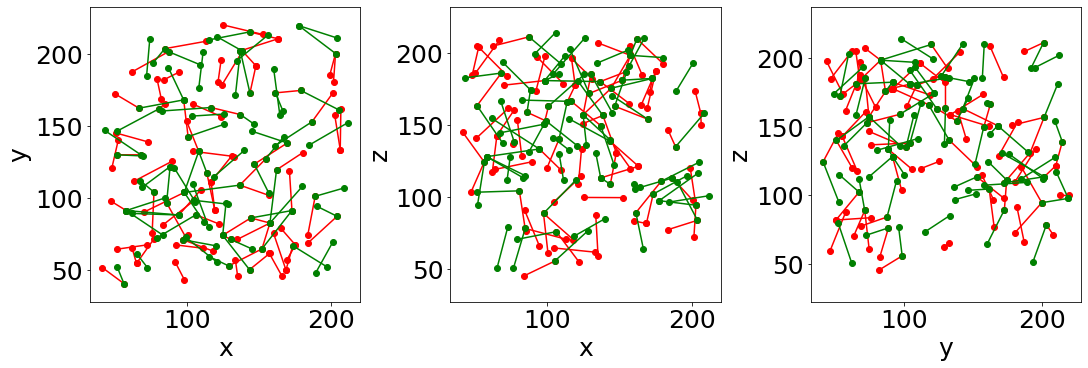

In [11]:
# Show all the lost and new contact at the first time step
fig, ax = plt.subplots(1,3, figsize = (5*3, 5), constrained_layout=True)
PlotContact(Lost[0],color='r',ax=ax, nameaxes=['z','y','x'])
PlotContact(New[0],color='g',ax=ax, nameaxes=['z','y','x'])

## G) Detect T1 events

In [4]:
# Read/Save image names and directories
pairsdirname = [ProcessPipeline[4]+'/','Contact_pair_']
readdirnamelost = [ProcessPipeline[6]+'/','Lost_']
readdirnamenew = [ProcessPipeline[6]+'/','New_']

namesave = 'T1_'
dirsave = ProcessPipeline[7]+'/'

# Images indexes
imrange = [1,2,3,4,5]

In [39]:
DetectT1_Batch(pairsdirname,
               readdirnamelost,
               readdirnamenew,
               namesave,
               dirsave,
               imrange[:-1],
               verbose=True,
               n0=3)

[1, 2, 3, 4]
Path exist: True
Q11_LostNewContacts/Lost_001_002
Q11_LostNewContacts/New_001_002
Q9_Contacts/Contact_pair_001


100%|██████████| 60/60 [00:00<00:00, 363.57it/s]


T1_001: done
Q11_LostNewContacts/Lost_002_003
Q11_LostNewContacts/New_002_003
Q9_Contacts/Contact_pair_002


100%|██████████| 56/56 [00:00<00:00, 359.14it/s]


T1_002: done
Q11_LostNewContacts/Lost_003_004
Q11_LostNewContacts/New_003_004
Q9_Contacts/Contact_pair_003


100%|██████████| 89/89 [00:00<00:00, 350.14it/s]


T1_003: done
Q11_LostNewContacts/Lost_004_005
Q11_LostNewContacts/New_004_005
Q9_Contacts/Contact_pair_004


100%|██████████| 56/56 [00:00<00:00, 364.62it/s]

T1_004: done


In [42]:
# Read/Save image names and directories
namesave = 'T1_'
dirsave = ProcessPipeline[7]+'/'
# Read the T1
T1_NewLost = ReadT1([dirsave,namesave],imrange[2:3], verbose=False, n0=3)

In [78]:
cat=1

LCoord=[]
LV=[]
Lscalar=[]
Lcateg=[]

ln = T1_NewLost[0][0]
count=1
for i in range(len(ln['lostCoord'])):
    if len(ln['newCoord'][i]) == cat:
        z1,y1,x1 = ln['lostCoord'][i][0][0]
        z2,y2,x2 = ln['lostCoord'][i][0][1]
               
        z1p,y1p,x1p = ln['newCoord'][i][0][0]
        z2p,y2p,x2p = ln['newCoord'][i][0][1]
        
        zm=(z2+z1)/2;ym=(y2+y1)/2;xm=(x2+x1)/2
        zmp=(z2p+z1p)/2;ymp=(y2p+y1p)/2;xmp=(x2p+x1p)/2 
        
        LCoord.append([z1,y1,x1])
        LV.append([z2-z1,y2-y1,x2-x1])
        Lscalar.append(count)
        Lcateg.append(-1)
        
        LCoord.append([z1p,y1p,x1p])
        LV.append([z2p-z1p,y2p-y1p,x2p-x1p])
        Lscalar.append(count)
        Lcateg.append(1)
        
        #zmm=(zm+zmp)/2;ymm=(ym+ymp)/2;xmm=(xm+xmp)/2
        #LCoord.append([z1,y1,x1])
        #LV.append([zmp-zm,ymp-ym,xmp-xm])
        #Lscalar.append(count)
        #Lcateg.append(0)
        
        count+=1
        
nl = T1_NewLost[1][0]
for i in range(len(nl['lostCoord'])):
    if len(nl['lostCoord'][i]) == cat:
        z1,y1,x1 = nl['lostCoord'][i][0][0]
        z2,y2,x2 = nl['lostCoord'][i][0][1]
        
        z1p,y1p,x1p = nl['newCoord'][i][0][0]
        z2p,y2p,x2p = nl['newCoord'][i][0][1]
        
        zm=(z2+z1)/2;ym=(y2+y1)/2;xm=(x2+x1)/2
        zmp=(z2p+z1p)/2;ymp=(y2p+y1p)/2;xmp=(x2p+x1p)/2 
        
        LCoord.append([z1,y1,x1])
        LV.append([z2-z1,y2-y1,x2-x1])
        Lscalar.append(count)
        Lcateg.append(-1)
        
        LCoord.append([z1p,y1p,x1p])
        LV.append([z2p-z1p,y2p-y1p,x2p-x1p])
        Lscalar.append(count)
        Lcateg.append(1)
        
        #zmm=(zm+zmp)/2;ymm=(ym+ymp)/2;xmm=(xm+xmp)/2
        #LCoord.append([zm,ym,xm])
        #LV.append([zmp-zm,ymp-ym,xmp-xm])
        #Lscalar.append(count)
        #Lcateg.append(0)
        count+=1

In [52]:
LV

[[2.916660599332218, 31.404164600909716, -9.99263098916947],
 [24.164737478188158, 4.876404124689799, 20.944102434322502],
 [21.519124517938508, 22.3629053367681, 5.458937229165514],
 [0.7182637923313564, -29.62699514344959, -13.503982468095643],
 [27.965826259091372, -15.34664445927433, -3.161000049627603],
 [31.392500759477286, 2.397163832324594, 12.251421446197341],
 [20.899653668953135, 25.293730216968612, -6.101684990052604],
 [17.441999484007994, -6.076400568192696, -26.386109054439657],
 [25.073589194657472, -15.890340264391867, -0.6543801829143234],
 [15.832730657197175, -27.678406111992615, 5.478875487615738],
 [13.42081611137624, 19.83876458669542, 20.368474093290487],
 [5.6669673797614735, 26.43215614257724, -18.900558893352624],
 [18.136987956103837, -23.363147195969233, -1.7080782306087343],
 [22.548418003034982, 2.102600008325936, 20.671369193996156],
 [24.164737478188158, 4.876404124689799, 20.944102434322502],
 [29.88761572855296, -7.907316268783241, 1.7524483842110214]

In [79]:
writeGlyphsVTK(np.asarray(LCoord),
                   {'link':np.asarray(LV), 
                    'T1':np.asarray(Lscalar),
                   'cat':np.asarray(Lcateg)},
                   fileName='T1_v2.vtk')

flatten vector
flatten scalar
flatten scalar


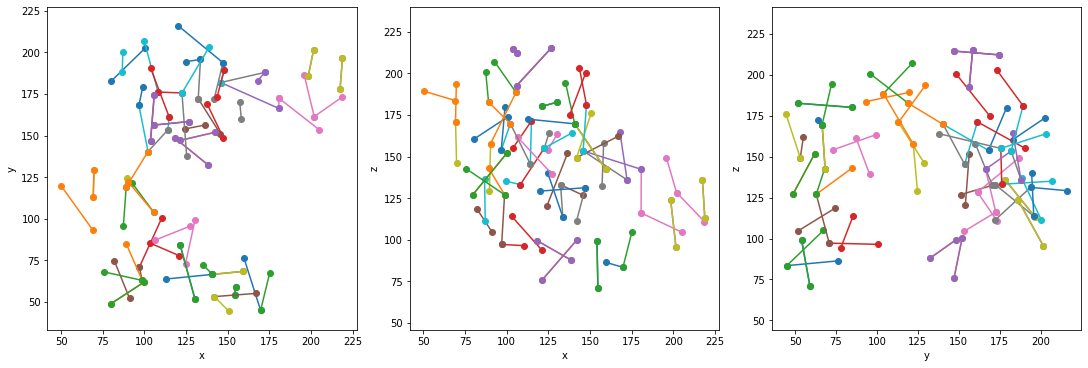

In [12]:
# show the T1 at the first time step
fig, ax = plt.subplots(1,3, figsize = (5*3, 5), constrained_layout=True)
PlotT1([T1_NewLost[0][0],T1_NewLost[1][0]], ax=ax, color=None, nameaxes=['z','y','x'])